## Model Comparison

Author :Nutan Mandale

Mentor: Vincent Ramdhanie

### Context

This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. At the end of the day I look at this data as a subset from all Ukrainian car fleet.

### Content

Dataset contains 9576 rows and 10 variables with essential meanings:

* car: manufacturer brand
* price: seller’s price in advertisement (in USD)
* body: car body type
* mileage: as mentioned in advertisement (‘000 Km)
* engV: rounded engine volume (‘000 cubic cm)
* engType: type of fuel (“Other” in this case should be treated as NA)
* registration: whether car registered in Ukraine or not
* year: year of production
* model: specific model name
* drive: drive type

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline

In [2]:
# import data
data = pd.read_csv("./car_ad.csv", encoding='latin-1')

### Data Analysis

In [3]:
data.head(3)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [5]:
data.price[data.price == 0].count()

267

In [6]:
data = data.drop(data[data.price == 0].index)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9309 entries, 0 to 9575
Data columns (total 10 columns):
car             9309 non-null object
price           9309 non-null float64
body            9309 non-null object
mileage         9309 non-null int64
engV            8884 non-null float64
engType         9309 non-null object
registration    9309 non-null object
year            9309 non-null int64
model           9309 non-null object
drive           8817 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 800.0+ KB


In [8]:
data.drive.unique()

array(['full', 'rear', 'front', nan], dtype=object)

In [9]:
data.model.unique()

array(['Kuga', 'E-Class', 'CL 550', 'B 180', 'X-Trail', 'Accord', 'Megane',
       'Qashqai', '316', '750', 'GLE-Class', 'M5', 'X5', 'Leaf',
       'Passat B6', 'A6', 'Sebring', 'XF', 'Sprinter 324 ïàññ.',
       '5 Series', '520', 'Outlander', 'Juke', 'Galant', 'Sportage',
       'Cayenne', 'Passat B5', 'Land Cruiser 200', 'Q7', 'Outlander XL',
       'Vito ïàññ.', 'Camry', 'Touareg', '530', 'Accent',
       'T5 (Transporter) ïàññ.', 'Land Cruiser Prado', 'Vectra C',
       'GLS 350', 'Q5', '318', 'Lacetti', 'Superb', 'Range Rover Sport',
       'Passat B7', 'Lancer X', 'Range Rover Evoque',
       'T5 (Transporter) ãðóç', 'Lanos', 'Pajero Wagon', 'Vito ãðóç.',
       'Octavia A5', 'Range Rover', '3', '6', 'LX 570', '740', 'GS 300',
       'A5', 'C-Class', 'Tucson', 'Octavia A7', 'S 350', 'Panamera',
       'FX 37', 'GX', 'CL 55 AMG', 'IQ', 'Model S', 'A4', 'Forester',
       'Ceed', 'Polo', '2121', 'Civic', 'Aveo', 'Lancer', 'Murano',
       'Focus', 'Sorento', 'Astra G', '147', 'ML 

In [10]:
from sklearn import model_selection, preprocessing
for car in data.columns:
    if data[car].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[car].values)) 
        data[car] = lbl.transform(list(data[car].values))

In [11]:
data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,25,15500.0,0,68,2.5,1,1,2010,490,1
1,52,20500.0,3,173,1.8,1,1,2011,332,3
2,52,35000.0,2,135,5.5,3,1,2008,240,3
3,52,17800.0,5,162,1.8,0,1,2012,206,0
4,52,33000.0,4,91,NaN,2,1,2013,332,2


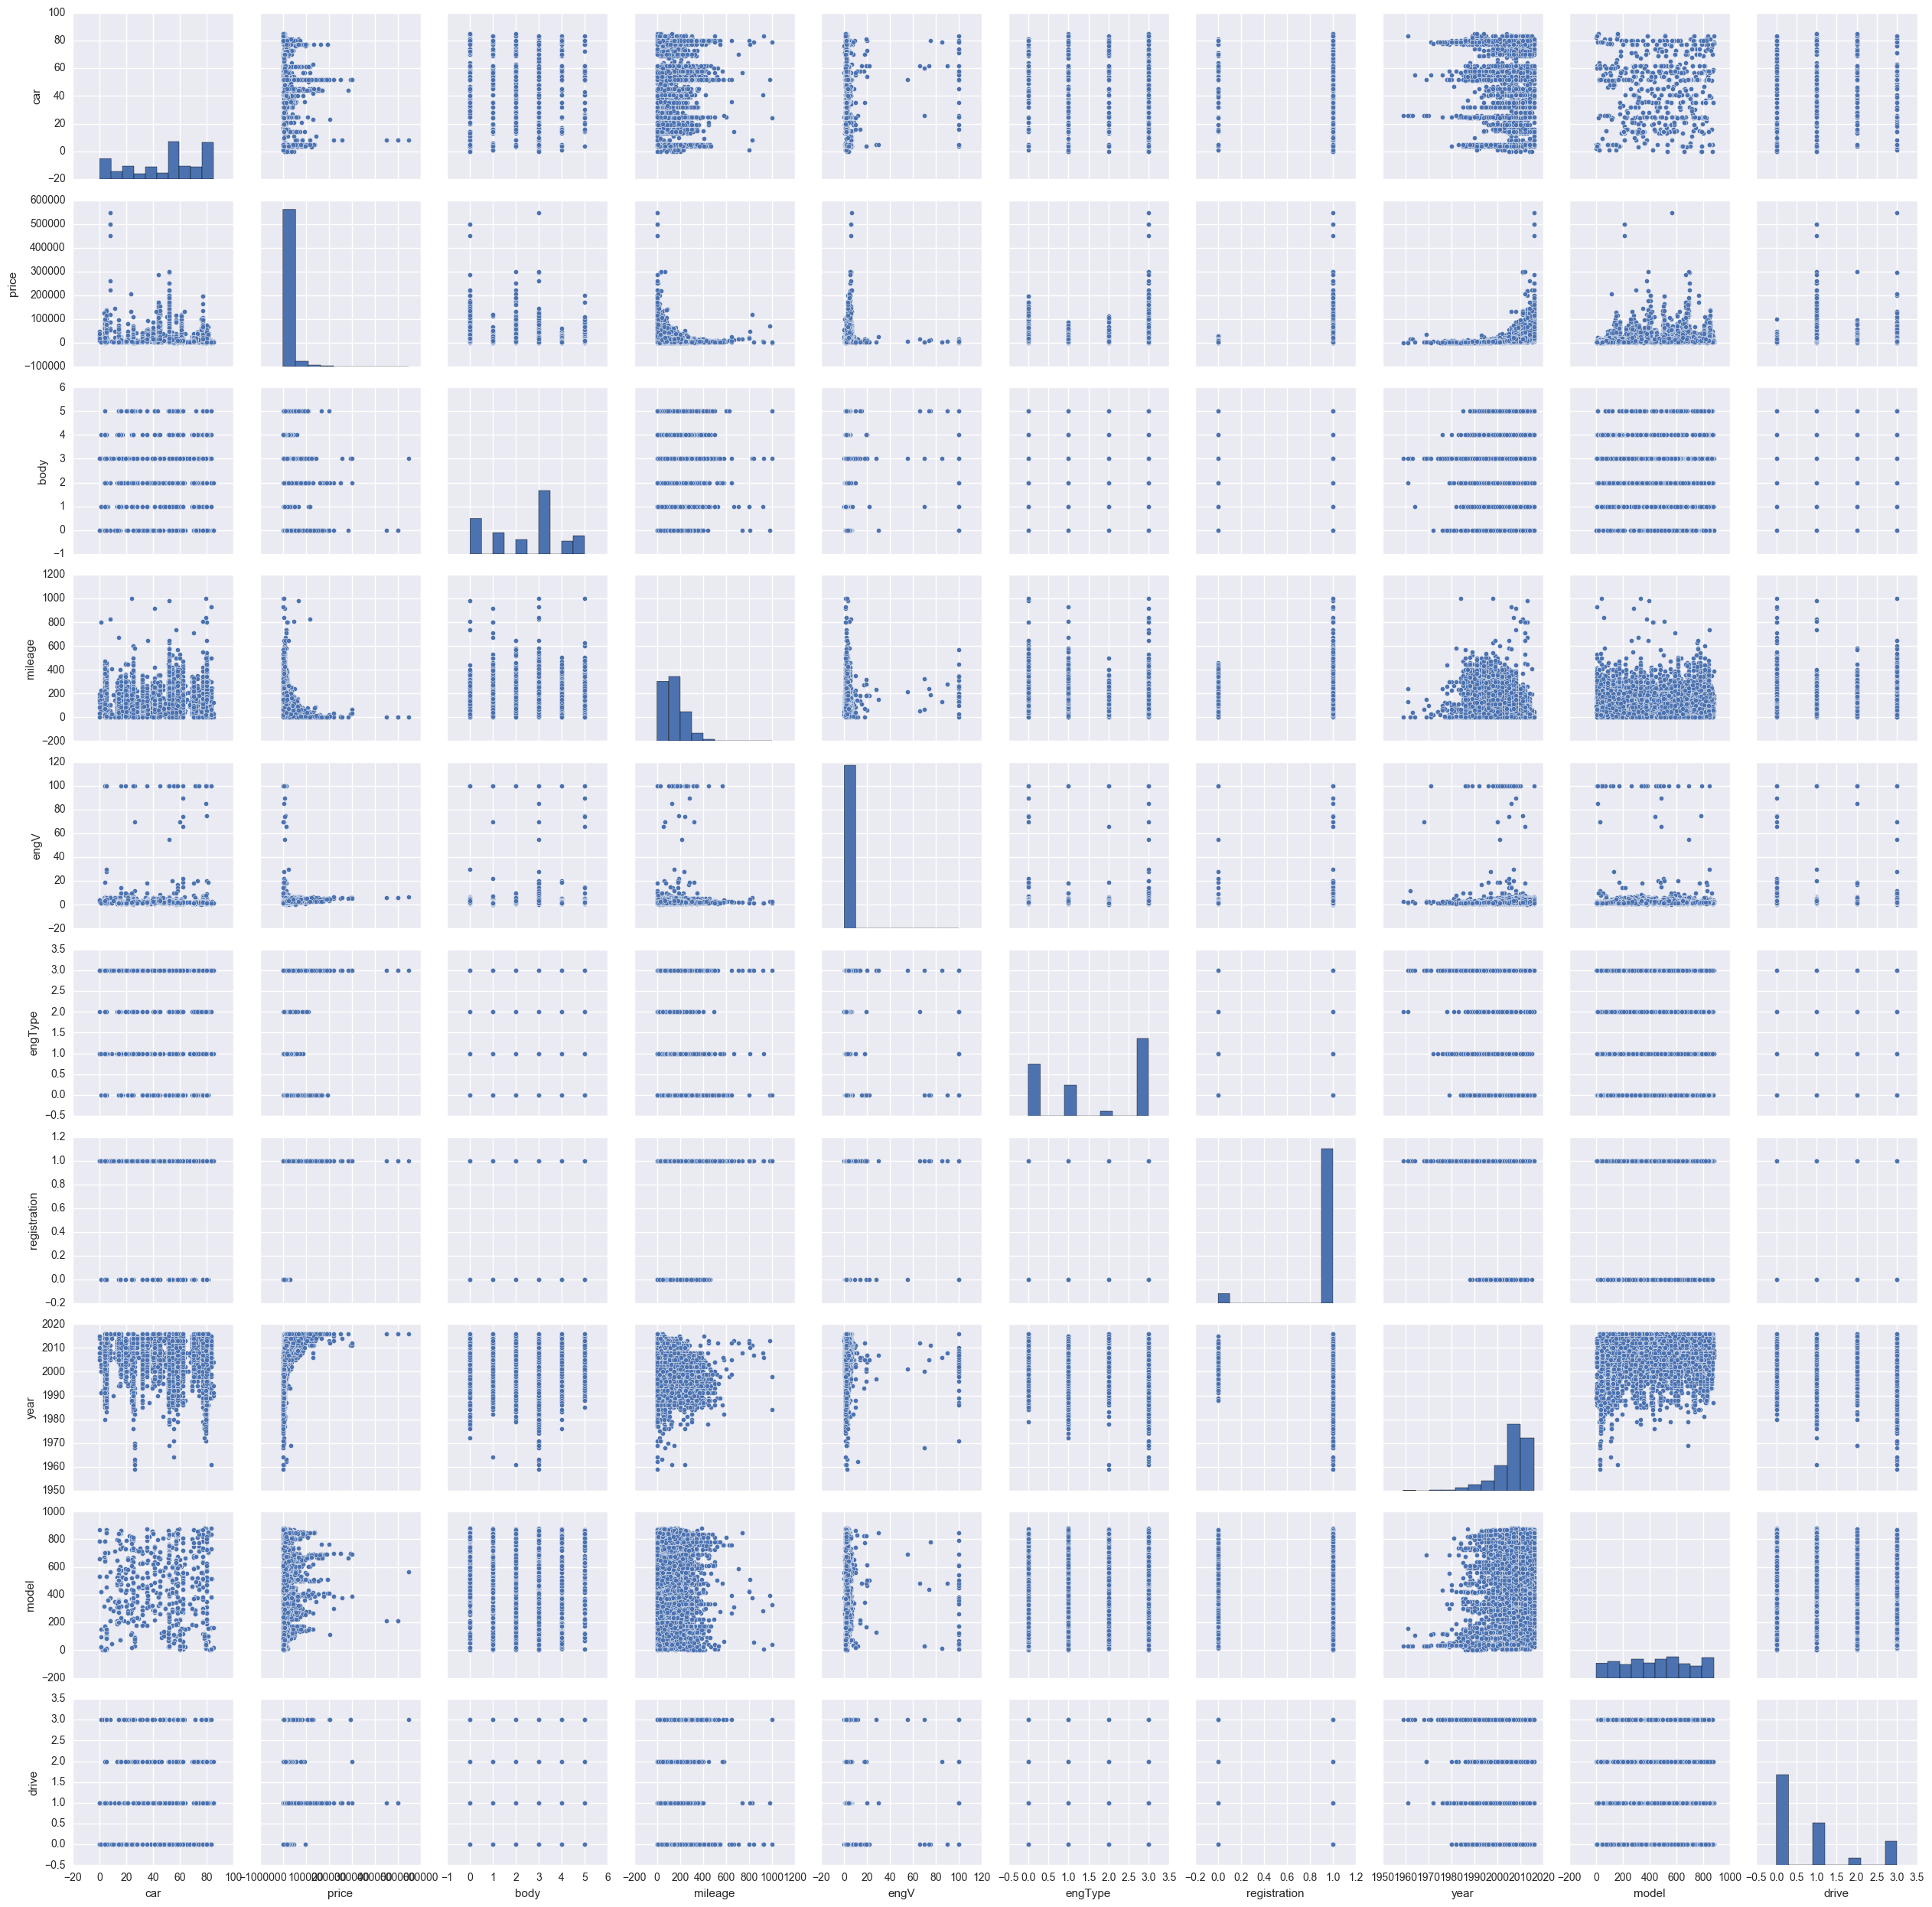

In [12]:
_ = sns.pairplot(data.dropna())

In [13]:
data = data.dropna()

In [14]:
data.shape

(8884, 10)

In [15]:
data.dtypes

car               int64
price           float64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
model             int64
drive             int64
dtype: object

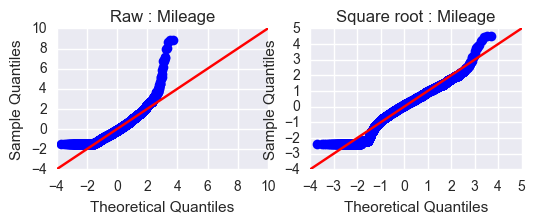

In [16]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data.mileage, line='45', fit=True, ax=ax)
ax.set_title('Raw : Mileage')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(data.mileage), line='45', fit=True, ax=ax)
ax.set_title('Square root : Mileage')

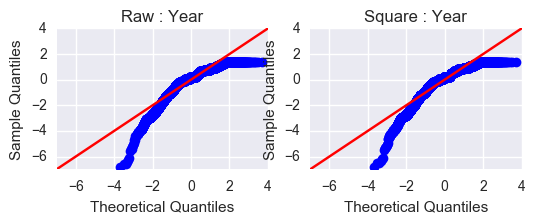

In [26]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data.year, line='45', fit=True, ax=ax)
ax.set_title('Raw : Year')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.square(data.year), line='45', fit=True, ax=ax)
ax.set_title('Square : Year')

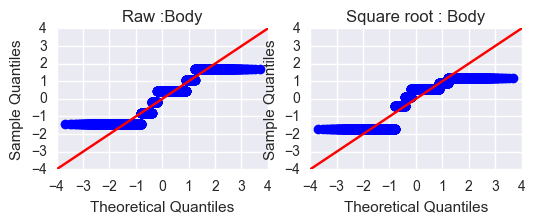

In [27]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data.body, line='45', fit=True, ax=ax)
ax.set_title('Raw :Body')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(data.body), line='45', fit=True, ax=ax)
ax.set_title('Square root : Body')

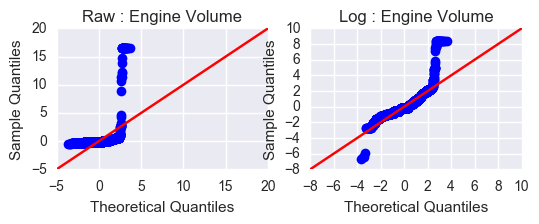

In [44]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data.engV, line='45', fit=True, ax=ax)
ax.set_title('Raw : Engine Volume')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.log(data.engV), line='45', fit=True, ax=ax)
ax.set_title('Log : Engine Volume')

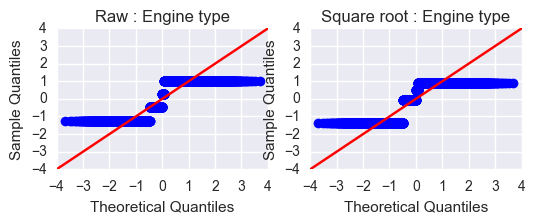

In [34]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data.engType, line='45', fit=True, ax=ax)
ax.set_title('Raw : Engine type')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(data.engType), line='45', fit=True, ax=ax)
ax.set_title('Square root : Engine type')

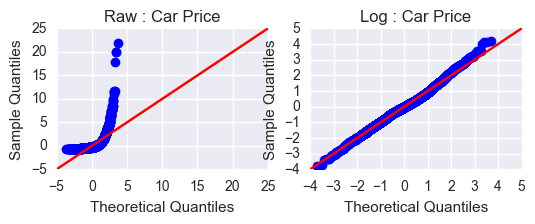

In [43]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data.price, line='45', fit=True, ax=ax)
ax.set_title('Raw : Car Price')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.log(data.price), line='45', fit=True, ax=ax)
ax.set_title('Log : Car Price')

In [45]:
data['price_l'] = np.log(data.price)
data['mileage_sqrt'] = np.sqrt(data['mileage'])
data['engV_l'] = np.log(data['engV'])

## Linear Regression

In [49]:
data_new = data[[
                'car',
                'price_l',
                'body',
                'mileage_sqrt',
                'engV_l',
                'engType',
                'registration',
                'year',
                'model',
                'drive'
                ]]

data_new.head()

,car,price_l,body,mileage_sqrt,engV_l,engType,registration,year,model,drive
0,25,9.648595,0,8.246211,0.916291,1,1,2010,490,1
1,52,9.928180,3,13.152946,0.587787,1,1,2011,332,3
2,52,10.463103,2,11.618950,1.704748,3,1,2008,240,3
3,52,9.786954,5,12.727922,0.587787,0,1,2012,206,0
5,57,9.717158,0,9.110434,0.693147,3,1,2013,844,1


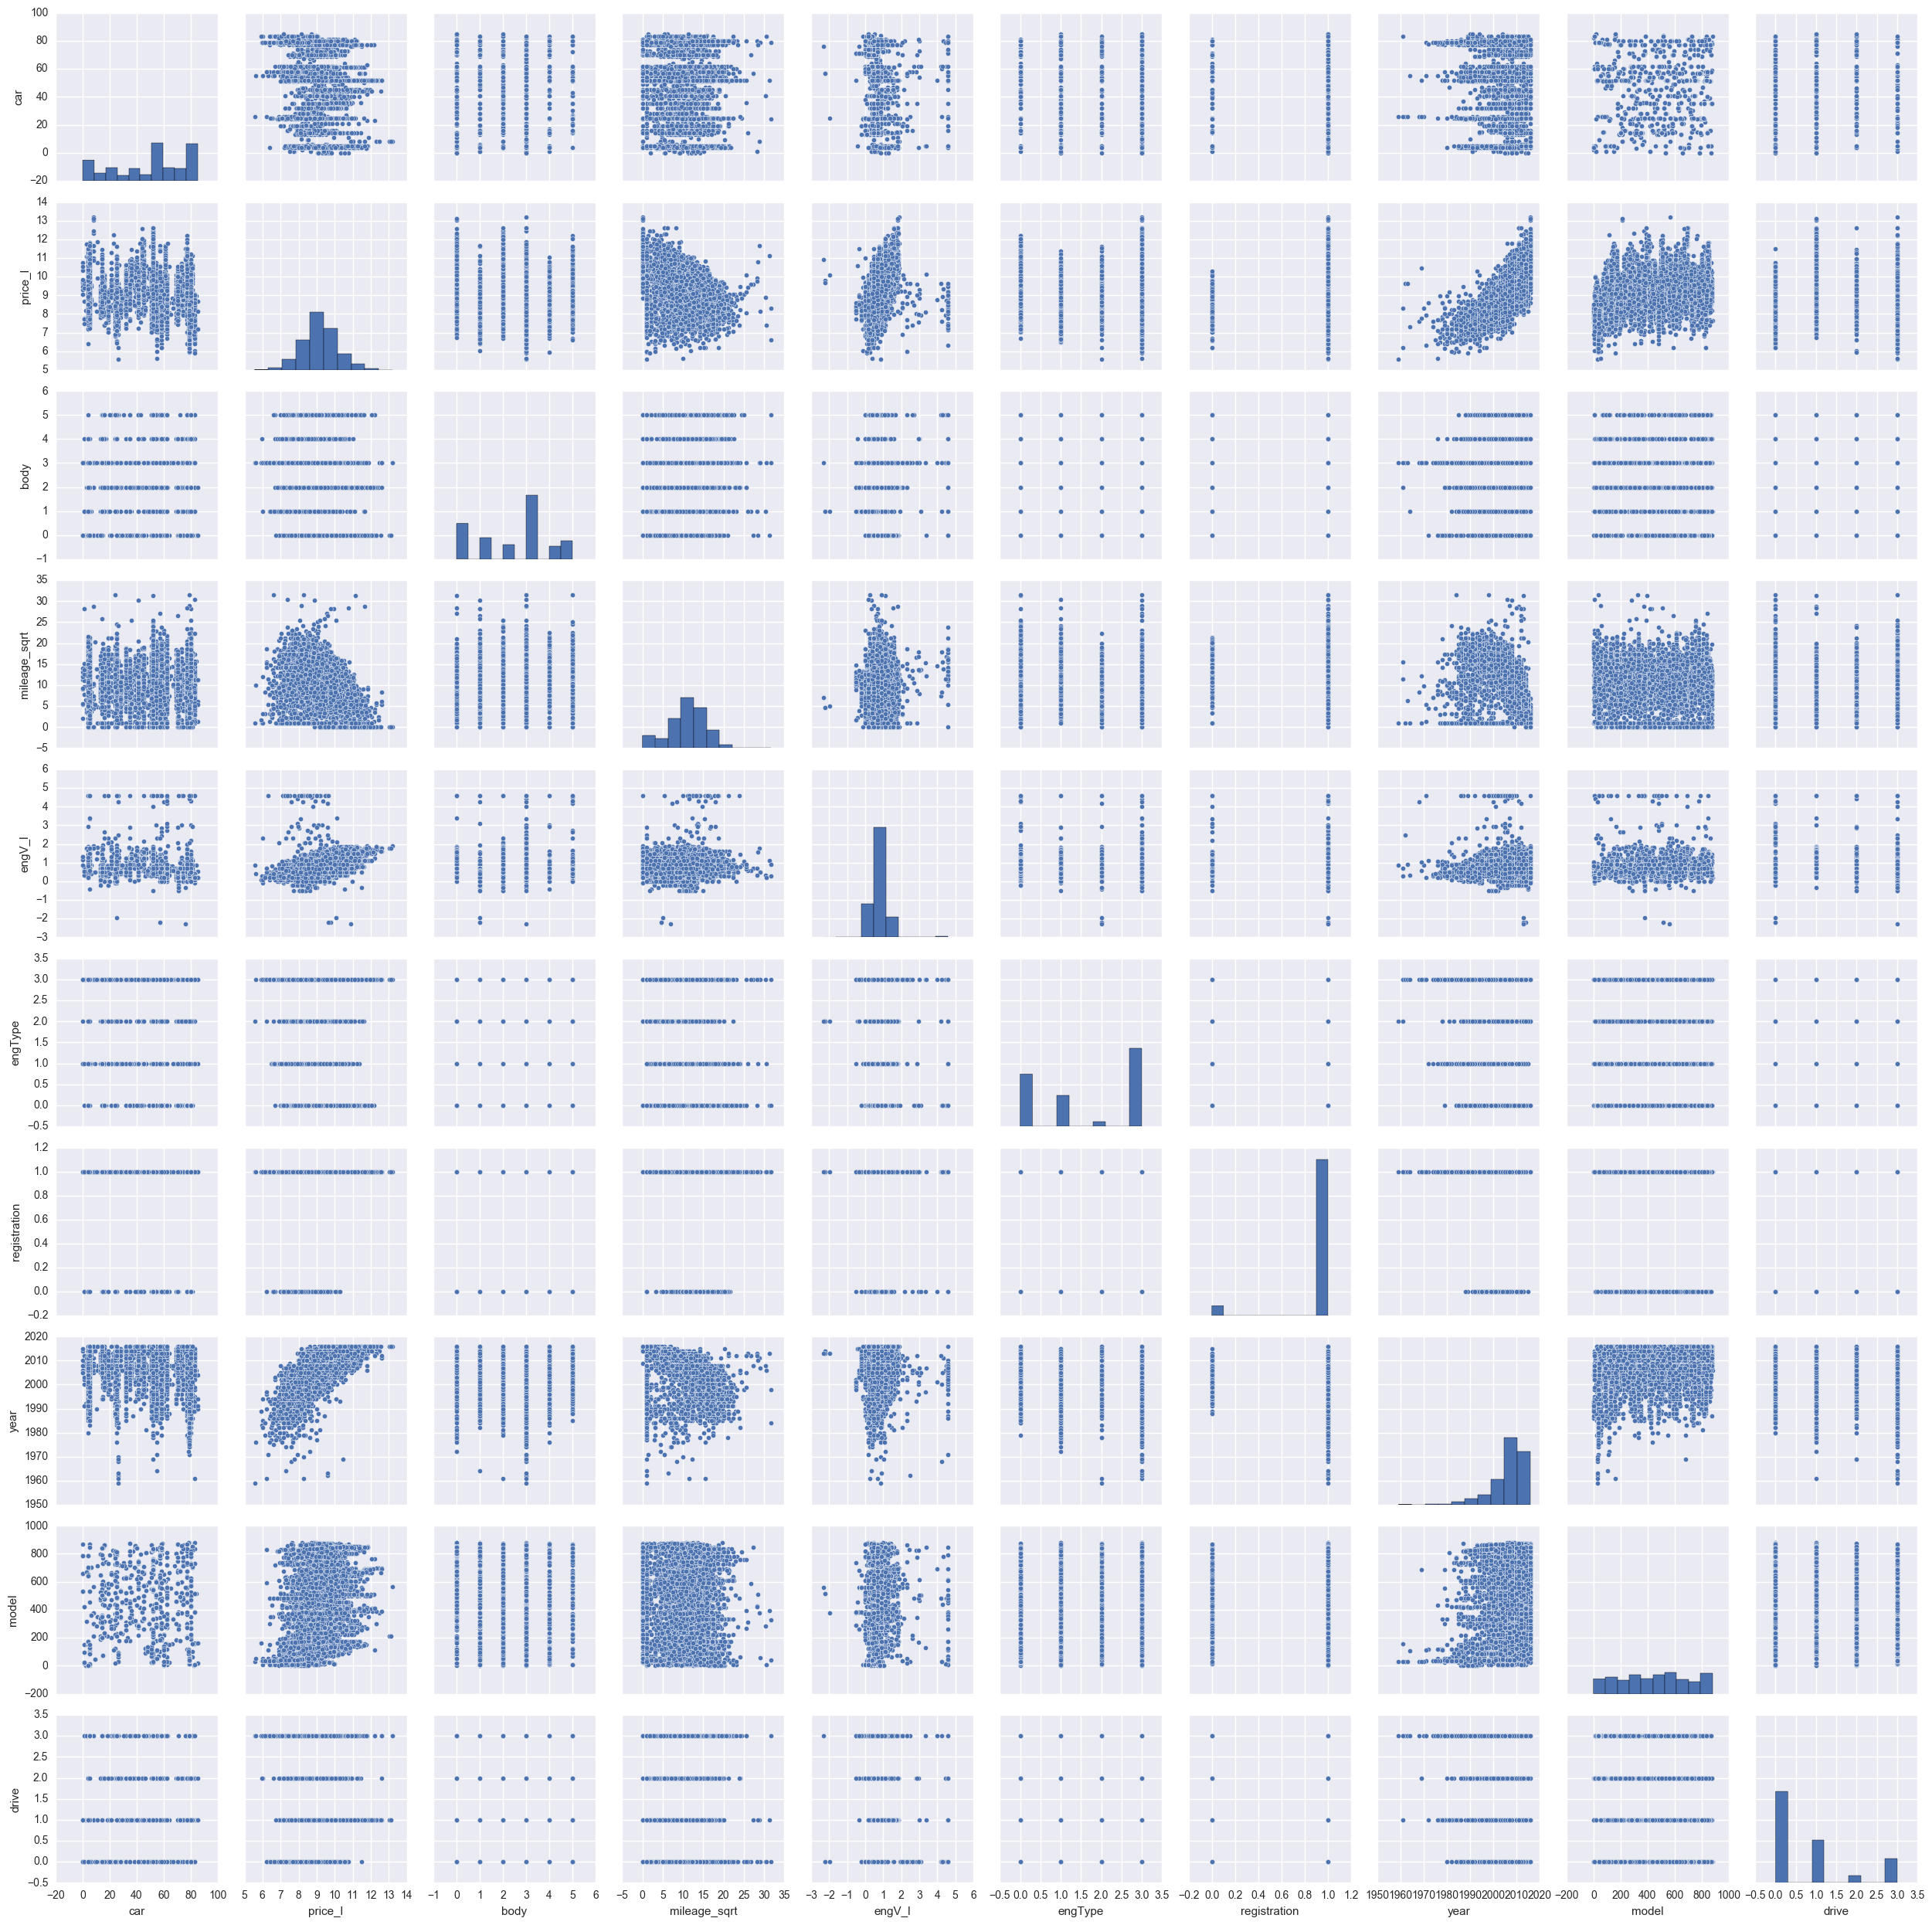

In [50]:
_ = sns.pairplot(data_new.dropna())

In [85]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
y = data_new["price_l"]
X = data_new.drop(["price_l"], axis=1)

print(y.shape)
print(X.shape)

(8884,)
(8884, 9)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Inspect the results.
print('\nCoefficients: \n', slr.coef_)
print('\nIntercept: %.3f\n' % (slr.intercept_) )
print('\nR-squared:')
print('%.3f' % (slr.score(X_train, y_train)) )
print('\nRMSE: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) )

score = cross_val_score(slr, X, y, cv=5, scoring='neg_mean_squared_error')
print("\nAccuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Coefficients: 
 [ -2.07468514e-03  -7.56365982e-02  -2.02929387e-02   6.56788499e-01
  -4.41759028e-02   7.14316513e-01   8.49237457e-02   3.82242364e-04
   1.32304433e-01]

Intercept: -162.091


R-squared:
0.725

RMSE: 0.480

Accuracy: -0.25 (+/- 0.04)


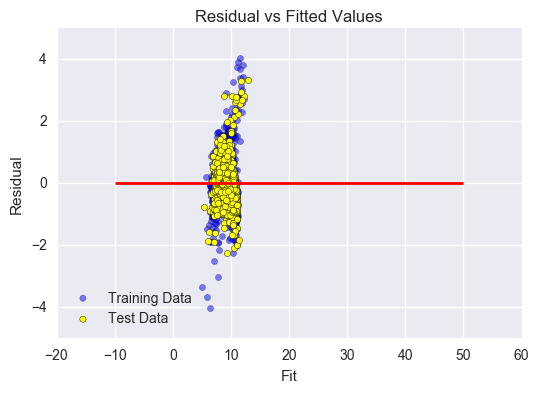

In [59]:
# Visualize
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training Data',alpha = 0.5)
plt.scatter(y_test_pred, y_test_pred - y_test, c='yellow', marker='o', label='Test Data')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.legend(loc='lower left')
plt.title('Residual vs Fitted Values');

In [69]:
predicted = y_test_pred
actual = y_test

result_df = pd.DataFrame({'Actual_price': actual, 'predict_price':predicted,'Diff' :actual - predicted})
result_df.head()

,Actual_price,Diff,predict_price
8978,8.665613,-0.627661,9.293274
1696,9.457200,0.194605,9.262595
87,11.512925,0.490749,11.022177
6830,11.657502,1.135795,10.521707
4008,8.293800,0.077452,8.216348


## K - Nearest Neighbor Regression

In [88]:
y = data["price"]
X = data.drop(["price"], axis=1)

from sklearn import neighbors
from sklearn.model_selection import cross_val_score

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('\nR-squared:')
print('%.3f' % (knn.score(X_train, y_train)) )

print('\nRMSE: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, y_pred))) )

score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


R-squared:
0.864

RMSE: 0.393
Unweighted Accuracy: 0.50 (+/- 0.16)
